<a href="https://colab.research.google.com/github/shahdcode/Credit-Card-Approval-Prediction/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Credit card prediction

##Imports & reading csv files



In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [75]:
application_record = pd.read_csv('/content/drive/MyDrive/Ai project/application_record.csv')
credit_record = pd.read_csv('/content/drive/MyDrive/Ai project/credit_record.csv')

##Application Record preprocessing



### Explore application_record dataset

In [76]:
print('Data Head')
application_record.head()  # First few rows

Data Head


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [77]:
print('Data Tail')
application_record.tail() # Number of rows and columns

Data Tail


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0
438556,6842885,F,N,Y,0,121500.0,Working,Secondary / secondary special,Married,House / apartment,-18858,-1201,1,0,1,0,Sales staff,2.0


In [78]:
print('Data Information')
application_record.info()  # Column types and non-null counts

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  

In [79]:
print(f"Dataset contains {application_record.shape[0]} rows and {application_record.shape[1]} columns.")


Dataset contains 438557 rows and 18 columns.


### Descriptive Statistics:

In [80]:
# Summarize numeric columns:
application_record.describe(include = "object")

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
count,438557,438557,438557,438557,438557,438557,438557,304354
unique,2,2,2,5,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,294440,275459,304074,226104,301821,299828,393831,78240


In [81]:
#Summarize categorical columns:
for col in application_record.select_dtypes(include='object').columns:
    print(f"Value counts for {col}:\n{application_record[col].value_counts()}\n")


Value counts for CODE_GENDER:
CODE_GENDER
F    294440
M    144117
Name: count, dtype: int64

Value counts for FLAG_OWN_CAR:
FLAG_OWN_CAR
N    275459
Y    163098
Name: count, dtype: int64

Value counts for FLAG_OWN_REALTY:
FLAG_OWN_REALTY
Y    304074
N    134483
Name: count, dtype: int64

Value counts for NAME_INCOME_TYPE:
NAME_INCOME_TYPE
Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: count, dtype: int64

Value counts for NAME_EDUCATION_TYPE:
NAME_EDUCATION_TYPE
Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: count, dtype: int64

Value counts for NAME_FAMILY_STATUS:
NAME_FAMILY_STATUS
Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow       

### Visualize Data Distribution

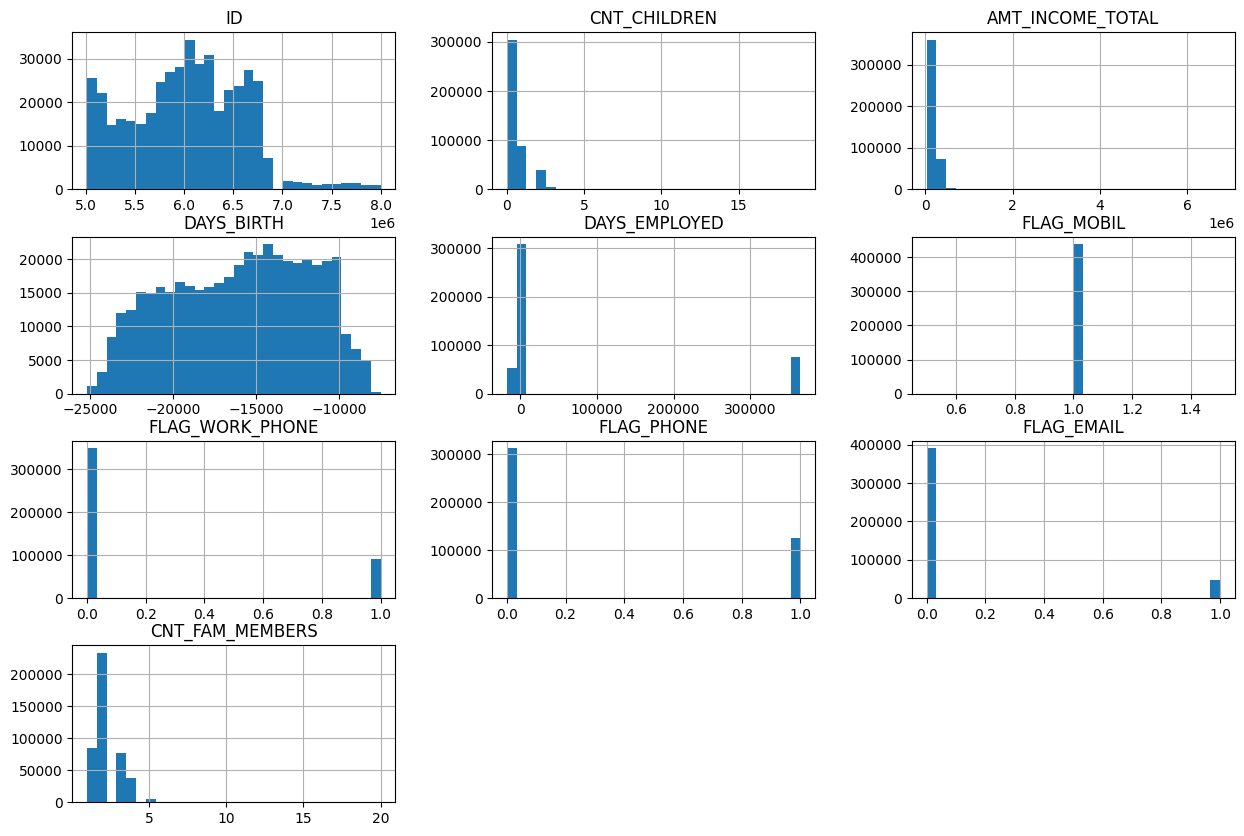

In [82]:
# Visualize numeric columns:
application_record.hist(bins=30, figsize=(15, 10))
plt.show()

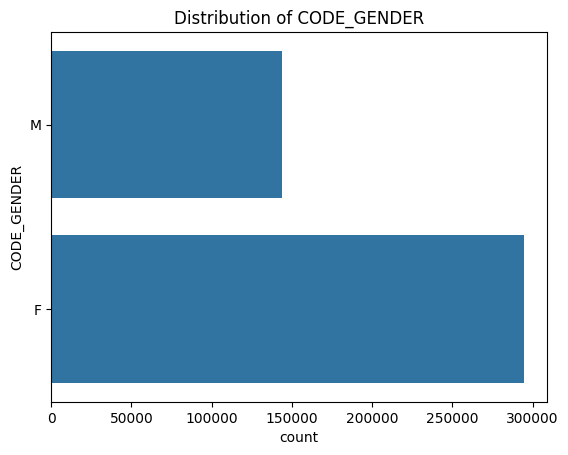

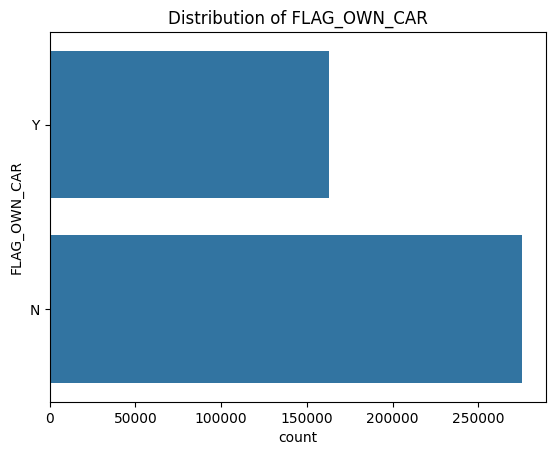

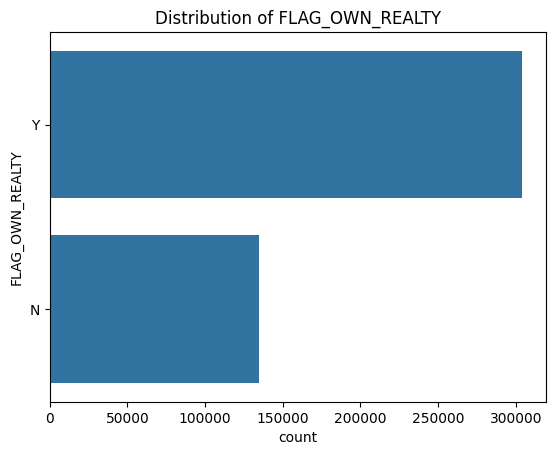

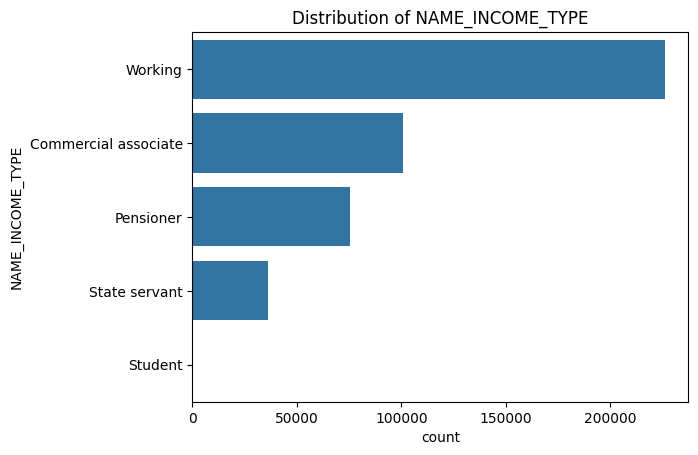

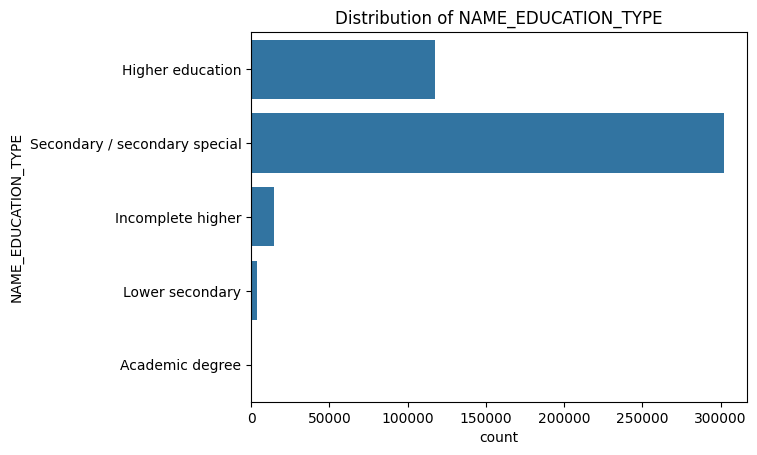

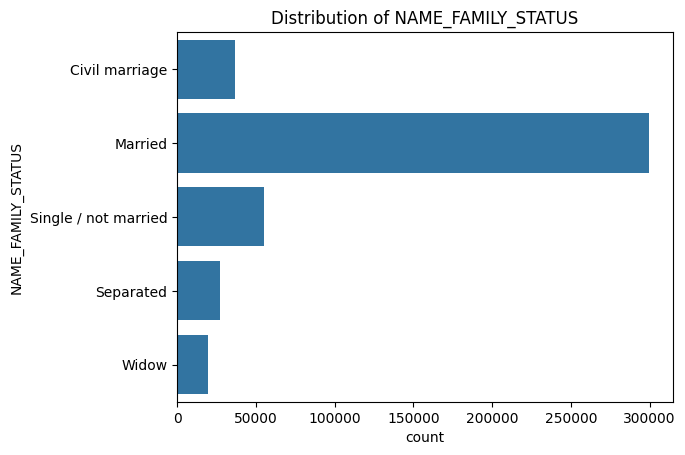

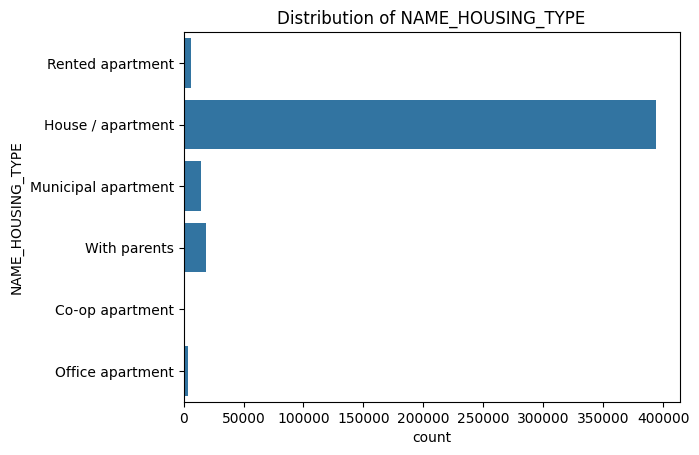

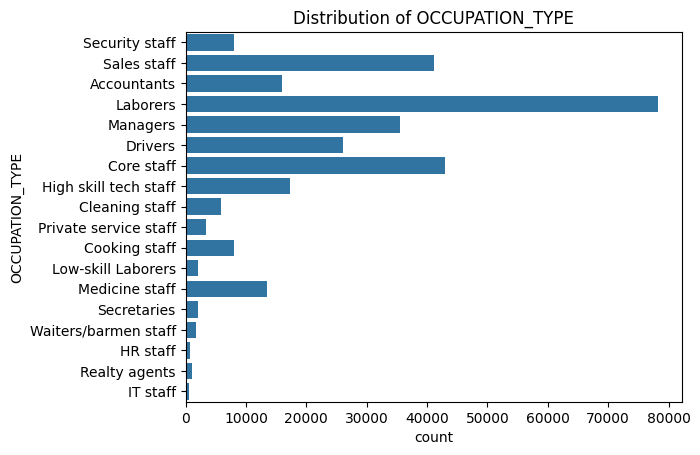

In [83]:
# Visualize categorical data:
categorical_columns = application_record.select_dtypes(include='object').columns
for col in categorical_columns:
    sns.countplot(y=col, data=application_record)
    plt.title(f"Distribution of {col}")
    plt.show()

In [84]:
# Check relationships between variables using scatter plot
numeric_columns = application_record.select_dtypes(include = "number").columns
# Check if 'Application Record' is in numeric_columns before dropping
if 'Application Record' in numeric_columns:
    numeric_columns = numeric_columns.drop('Application Record')
print(numeric_columns)
print(application_record.shape)

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS'],
      dtype='object')
(438557, 18)


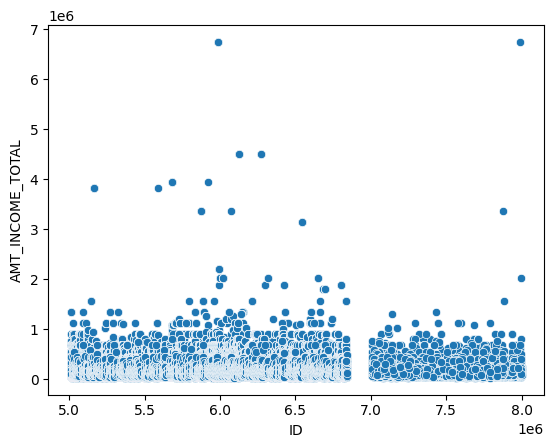

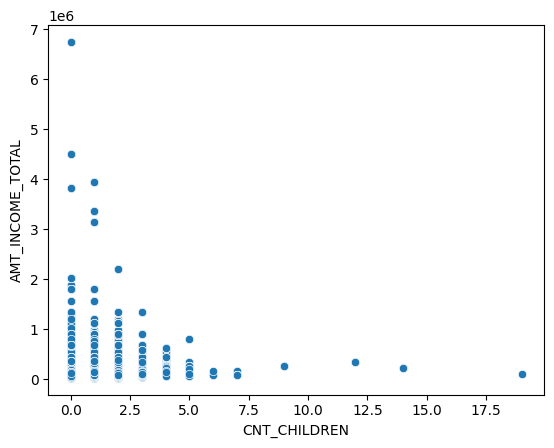

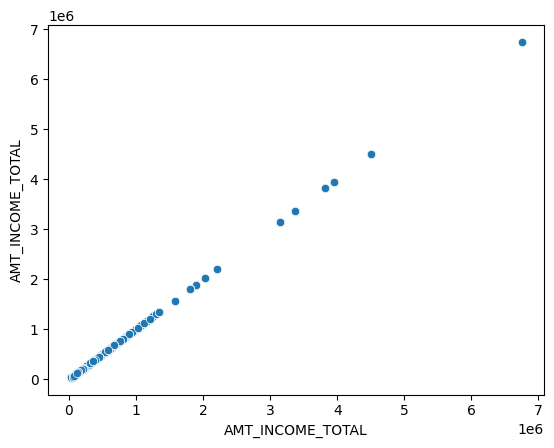

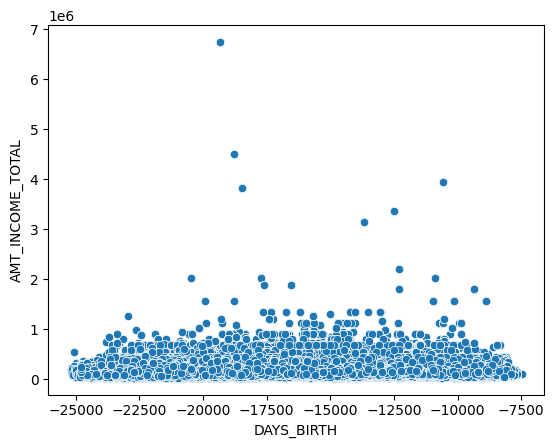

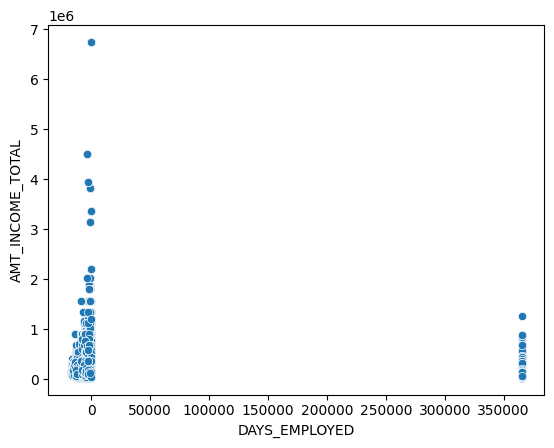

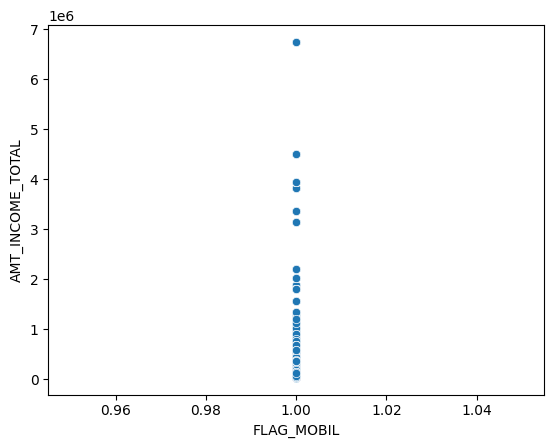

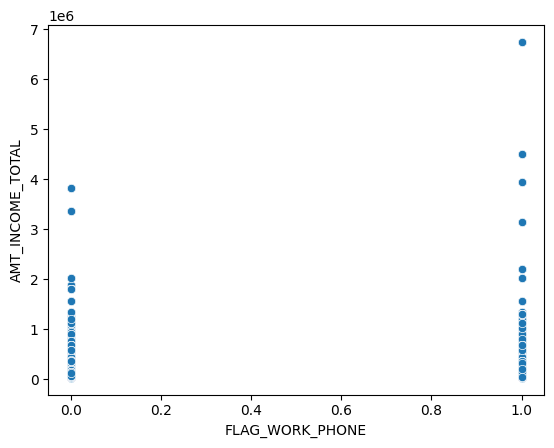

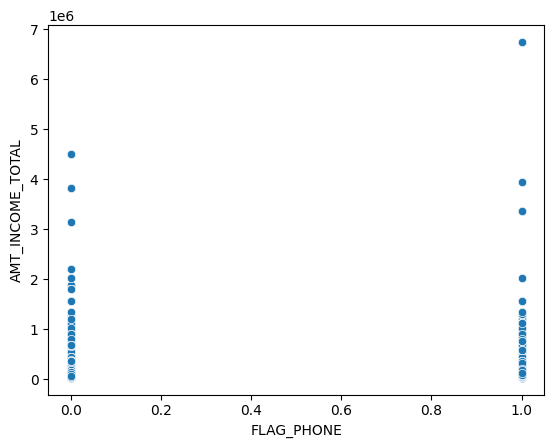

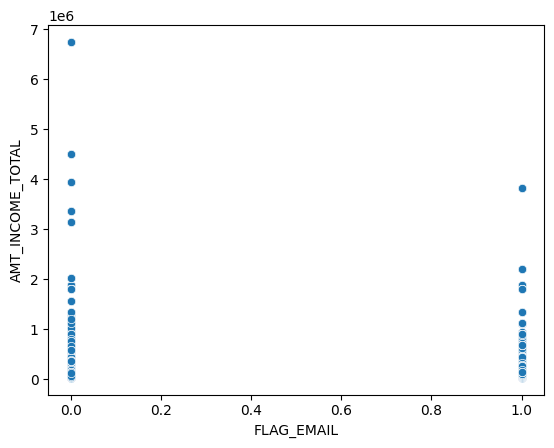

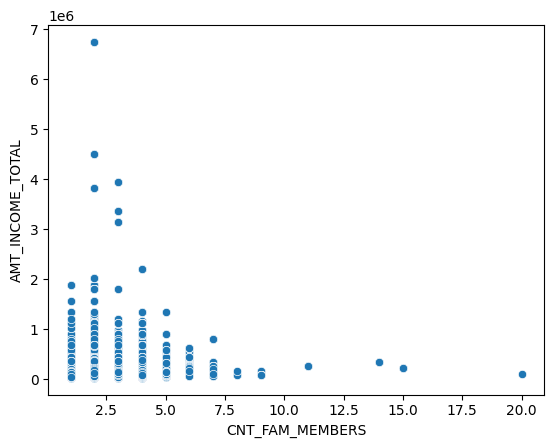

In [85]:
# ha5aleeh bel AMT_INCOME_TOTAL 3shan howa numeric
for i in numeric_columns:
  sns.scatterplot(data=application_record, x =i,y = 'AMT_INCOME_TOTAL')
  plt.show()

### Identify Initial issues

In [86]:
# Check for missing values:
application_record.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


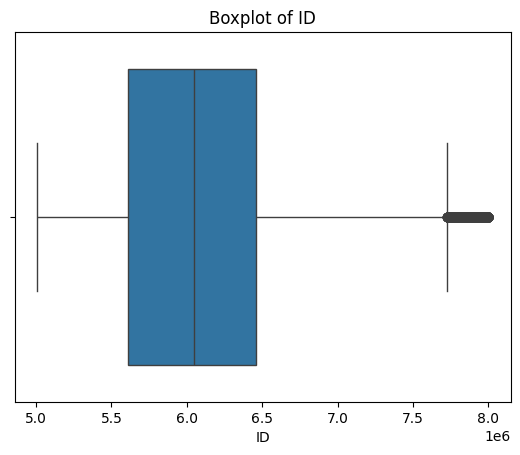

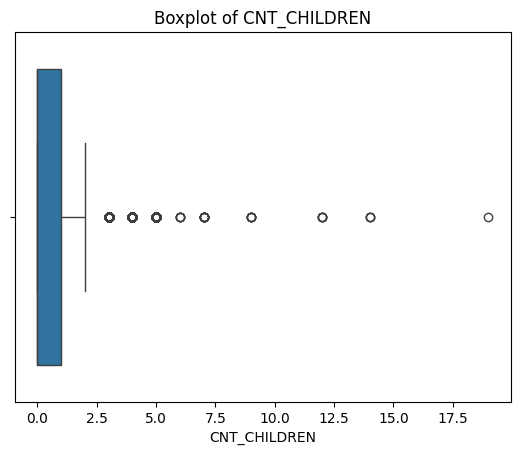

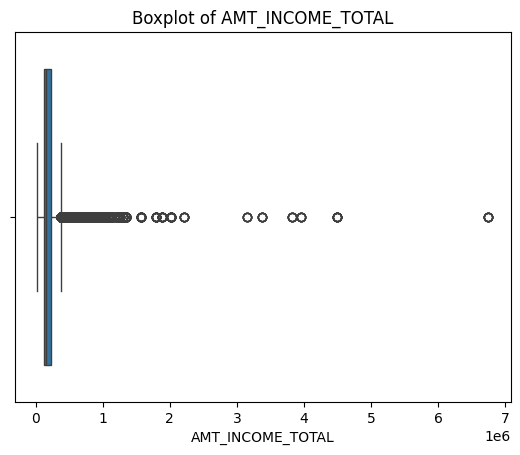

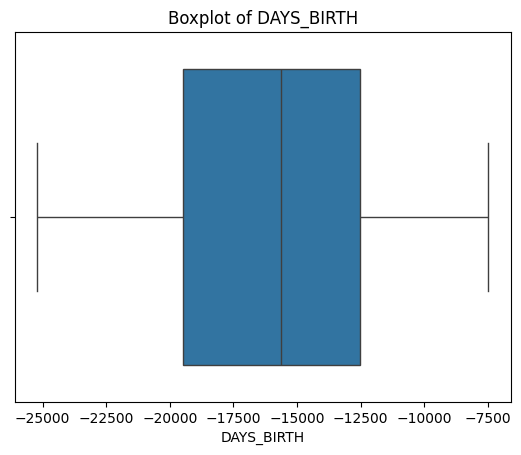

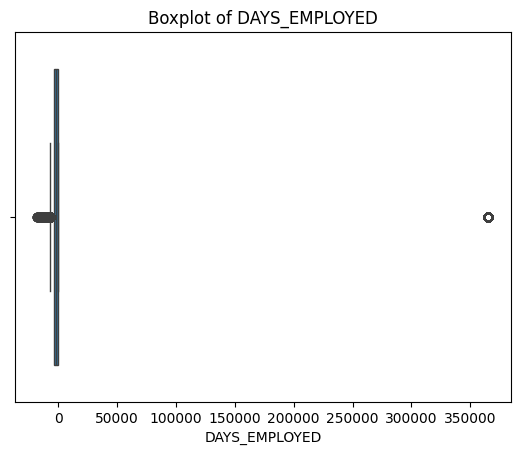

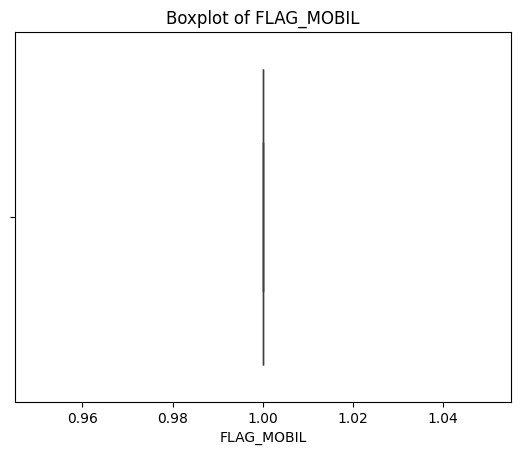

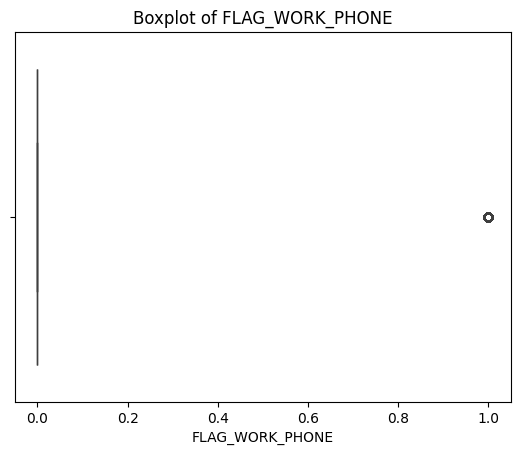

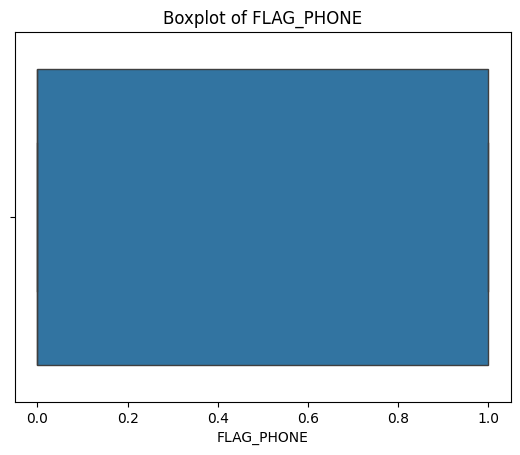

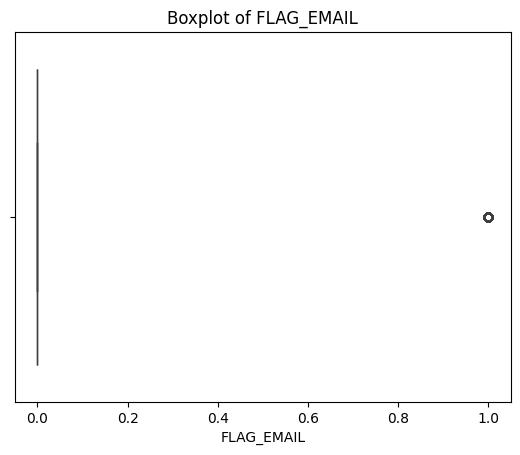

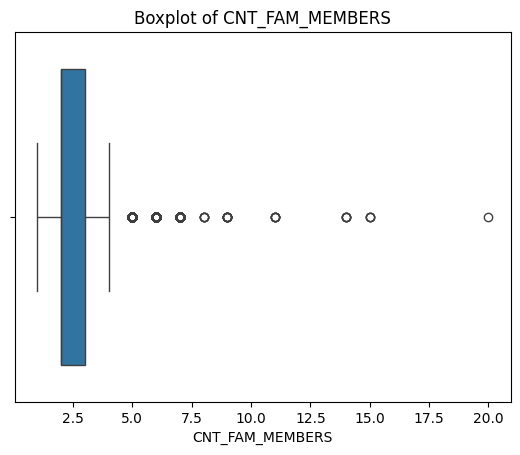

In [87]:
# Look for outliers:
for col in application_record.select_dtypes(include='number').columns:
    sns.boxplot(x=application_record[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

### Hanlde Missing Values

In [88]:
missing_percentage = application_record.isnull().mean() * 100
print(missing_percentage)


ID                      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
FLAG_OWN_REALTY         0.000000
CNT_CHILDREN            0.000000
AMT_INCOME_TOTAL        0.000000
NAME_INCOME_TYPE        0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_FAMILY_STATUS      0.000000
NAME_HOUSING_TYPE       0.000000
DAYS_BIRTH              0.000000
DAYS_EMPLOYED           0.000000
FLAG_MOBIL              0.000000
FLAG_WORK_PHONE         0.000000
FLAG_PHONE              0.000000
FLAG_EMAIL              0.000000
OCCUPATION_TYPE        30.601039
CNT_FAM_MEMBERS         0.000000
dtype: float64


In [89]:
rows_with_missing = application_record.isnull().sum(axis=1)
print(rows_with_missing.value_counts())

0    304354
1    134203
Name: count, dtype: int64


In [90]:
data = application_record.dropna(thresh=len(application_record) * 0.5, axis=1)
data.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [91]:
data['OCCUPATION_TYPE'] = data['OCCUPATION_TYPE'].fillna(data['OCCUPATION_TYPE'].mode()[0])


### Correct obvious errors

In [92]:
# Step 2: Correct obvious errors in numeric columns, such as negative or out-of-range values
# For example, correcting 'CNT_CHILDREN' to be non-negative and within a reasonable range
data['CNT_CHILDREN'] = data['CNT_CHILDREN'].apply(lambda x: max(x, 0))

# Step 3: Ensure 'CNT_FAM_MEMBERS' is consistent with 'CNT_CHILDREN' (at least 1 more than children)
data['CNT_FAM_MEMBERS'] = data[['CNT_CHILDREN', 'CNT_FAM_MEMBERS']].max(axis=1)

# Step 4: Correct unrealistic income values
# Assuming an income below 1000 or excessively high values (e.g., > 1,000,000) are errors
data['AMT_INCOME_TOTAL'] = data['AMT_INCOME_TOTAL'].clip(lower=1000, upper=1000000)

# Step 5: Handle invalid categorical entries if any (e.g., 'X' for gender)
if 'CODE_GENDER' in data.columns:
    data = data[data['CODE_GENDER'].isin(['M', 'F'])]

# Displaying updated data summary
data_info = data.info()
data_describe = data.describe()
data_info, data_describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

(None,
                  ID   CNT_CHILDREN  AMT_INCOME_TOTAL     DAYS_BIRTH  \
 count  4.385570e+05  438557.000000     438557.000000  438557.000000   
 mean   6.022176e+06       0.427390     186930.234577  -15997.904649   
 std    5.716370e+05       0.724882      99034.808831    4185.030007   
 min    5.008804e+06       0.000000      26100.000000  -25201.000000   
 25%    5.609375e+06       0.000000     121500.000000  -19483.000000   
 50%    6.047745e+06       0.000000     160780.500000  -15630.000000   
 75%    6.456971e+06       1.000000     225000.000000  -12514.000000   
 max    7.999952e+06      19.000000    1000000.000000   -7489.000000   
 
        DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE     FLAG_PHONE  \
 count  438557.000000    438557.0    438557.000000  438557.000000   
 mean    60563.675328         1.0         0.206133       0.287771   
 std    138767.799647         0.0         0.404527       0.452724   
 min    -17531.000000         1.0         0.000000       0.000000  

In [93]:
# check after cleaining data
data.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [94]:
# Get all rows with duplicate IDs
duplicate_sample = data[data['ID'].duplicated(keep=False)]

# Count the total number of rows with duplicate IDs
total_duplicates = len(duplicate_sample)

# Calculate the percentage of duplicate records
percentage_duplicates = (total_duplicates / len(data)) * 100

# Group by ID and explicitly exclude the grouping column for conflict detection
conflicts = (
    duplicate_sample.groupby('ID', group_keys=False)
    .apply(lambda group: group['CODE_GENDER'].nunique() > 1)
)
conflicting_ids = conflicts[conflicts].index.tolist()

# Output results
print(f"Number of duplicate rows: {data.duplicated().sum()}")
print(f"Total duplicate ID rows: {total_duplicates}")
print(f"Percentage of duplicate rows: {percentage_duplicates:.2f}%")
print(f"Number of conflicting IDs: {len(conflicting_ids)}")
print(f"Conflicting IDs: {conflicting_ids[:10]} (showing first 10)")

<ipython-input-94-e92e3343599b>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group['CODE_GENDER'].nunique() > 1)


Number of duplicate rows: 0
Total duplicate ID rows: 94
Percentage of duplicate rows: 0.02%
Number of conflicting IDs: 26
Conflicting IDs: [7022197, 7022327, 7023108, 7023651, 7024111, 7045885, 7091721, 7137299, 7154598, 7154819] (showing first 10)


In [95]:
duplicate_sample = data[data['ID'].duplicated(keep=False)]
duplicate_sample.head(20)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
421211,7702516,F,N,Y,2,180000.0,Working,Secondary / secondary special,Married,House / apartment,-11753,-1256,1,1,1,0,Sales staff,4.0
421268,7602432,M,N,Y,0,315000.0,Commercial associate,Higher education,Civil marriage,House / apartment,-16627,-1304,1,0,1,0,Drivers,2.0
421349,7602432,F,N,N,0,117000.0,Pensioner,Higher education,Married,House / apartment,-24708,365243,1,0,0,0,Laborers,2.0
421464,7836971,M,Y,N,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13771,-5520,1,0,0,0,Laborers,3.0
421698,7213374,M,Y,N,0,148500.0,Working,Secondary / secondary special,Married,House / apartment,-9950,-961,1,0,1,0,Laborers,2.0
421726,7052783,M,Y,Y,0,157500.0,Working,Higher education,Married,House / apartment,-13428,-2589,1,0,1,0,Laborers,2.0
421907,7023651,M,Y,N,1,157500.0,Commercial associate,Incomplete higher,Married,House / apartment,-10521,-1457,1,0,0,0,Drivers,3.0
422068,7838075,M,N,Y,0,337500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18198,-1275,1,0,0,1,Drivers,2.0
422077,7636389,M,N,N,0,135000.0,Commercial associate,Higher education,Married,House / apartment,-9624,-666,1,0,1,0,Core staff,2.0
422119,7052812,F,N,Y,0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15002,-123,1,0,0,0,Accountants,1.0


In [96]:
# Drop rows with duplicate IDs, keeping only the first occurrence
cleaned_data = data[~data['ID'].duplicated(keep='first')]

# Re-run the analysis on the cleaned dataset
duplicate_sample_after = cleaned_data[cleaned_data['ID'].duplicated(keep=False)]

# Count the total number of rows with duplicate IDs after cleaning
total_duplicates_after = len(duplicate_sample_after)

# Calculate the percentage of duplicate records after cleaning
percentage_duplicates_after = (total_duplicates_after / len(cleaned_data)) * 100

# Group by ID to find conflicts within duplicate IDs after cleaning
conflicts_after = (
    duplicate_sample_after.groupby('ID', group_keys=False)
    .apply(lambda group: group['CODE_GENDER'].nunique() > 1)
)
conflicting_ids_after = conflicts_after[conflicts_after].index.tolist()

# Output results before and after cleaning
print("Before Cleaning:")
print(f"Number of duplicate rows: {data.duplicated().sum()}")
print(f"Total duplicate ID rows: {total_duplicates}")
print(f"Percentage of duplicate rows: {percentage_duplicates:.2f}%")
print(f"Number of conflicting IDs: {len(conflicting_ids)}")
print(f"Conflicting IDs: {conflicting_ids[:10]} (showing first 10)")

print("\nAfter Cleaning:")
print(f"Number of duplicate rows: {cleaned_data.duplicated().sum()}")
print(f"Total duplicate ID rows: {total_duplicates_after}")
print(f"Percentage of duplicate rows: {percentage_duplicates_after:.2f}%")
print(f"Number of conflicting IDs: {len(conflicting_ids_after)}")
print(f"Conflicting IDs: {conflicting_ids_after[:10]} (showing first 10)")


Before Cleaning:


<ipython-input-96-f70d501430f2>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group['CODE_GENDER'].nunique() > 1)


Number of duplicate rows: 0
Total duplicate ID rows: 94
Percentage of duplicate rows: 0.02%
Number of conflicting IDs: 26
Conflicting IDs: [7022197, 7022327, 7023108, 7023651, 7024111, 7045885, 7091721, 7137299, 7154598, 7154819] (showing first 10)

After Cleaning:
Number of duplicate rows: 0
Total duplicate ID rows: 0
Percentage of duplicate rows: 0.00%
Number of conflicting IDs: 0
Conflicting IDs: [] (showing first 10)


In [97]:
# Drop rows with duplicate IDs, keeping only the first occurrence
cleaned_data = data[~data['ID'].duplicated(keep='first')]

# Output the result
print(f"Original dataset size: {len(data)}")
print(f"Cleaned dataset size: {len(cleaned_data)}")
print(f"Number of rows removed: {len(data) - len(cleaned_data)}")


Original dataset size: 438557
Cleaned dataset size: 438510
Number of rows removed: 47


### Saving changes to csv file

In [40]:
cleaned_data.to_csv('application_record_cleaned.csv', index=False)
files.download('application_record_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Credit Record preprocessing



In [98]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [99]:
credit_record.shape

(1048575, 3)

In [100]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [101]:
credit_record.isnull().sum()

,0
ID,0
MONTHS_BALANCE,0
STATUS,0


In [102]:
# Count the number of unique values in each column
unique_counts = credit_record.nunique()
print(unique_counts)

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64


In [103]:
credit_record.duplicated().sum()

0

In [104]:
print(credit_record.describe())

                 ID  MONTHS_BALANCE
count  1.048575e+06    1.048575e+06
mean   5.068286e+06   -1.913700e+01
std    4.615058e+04    1.402350e+01
min    5.001711e+06   -6.000000e+01
25%    5.023644e+06   -2.900000e+01
50%    5.062104e+06   -1.700000e+01
75%    5.113856e+06   -7.000000e+00
max    5.150487e+06    0.000000e+00


In [68]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40824 entries, 0 to 40823
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      40824 non-null  int64 
 1   STATUS  40824 non-null  object
dtypes: int64(1), object(1)
memory usage: 638.0+ KB


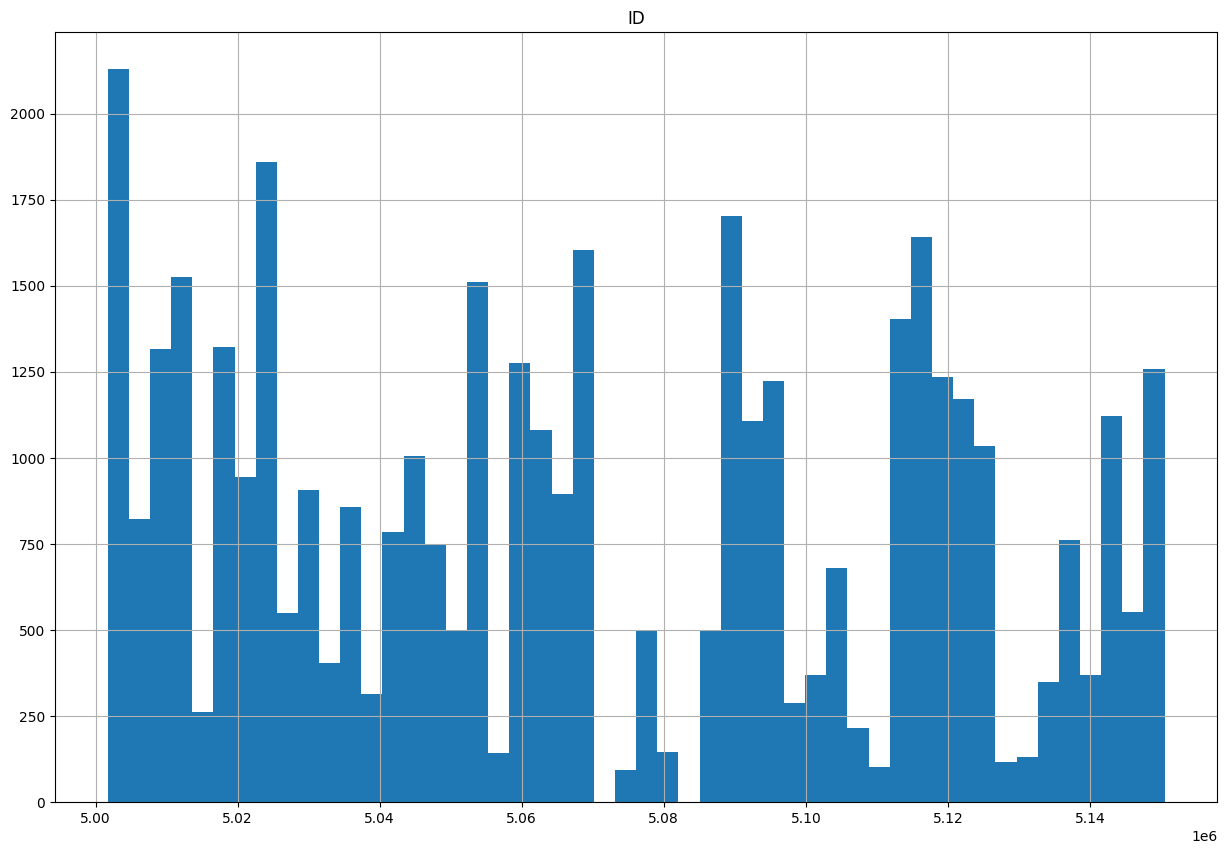

In [69]:
credit_record.hist(bins=50, figsize=(15, 10))
plt.show()

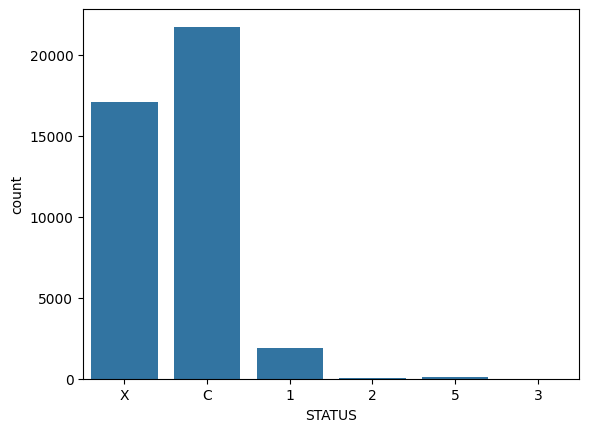

In [72]:
sns.countplot(data=credit_record, x='STATUS')
plt.show()

In [73]:
sns.boxplot(data=credit_record, x='MONTHS_BALANCE')
plt.show()

ValueError: Could not interpret value `MONTHS_BALANCE` for `x`. An entry with this name does not appear in `data`.

In [105]:
valid_categories = ['C', 'X', 'O','1','2','3','4','5']
credit_record = credit_record[credit_record['STATUS'].isin(valid_categories)]

In [108]:
# Check unique values in column_name after filtering
print(credit_record['STATUS'].unique())

['X' 'C' '1' '2' '3' '4' '5']


In [109]:
print(credit_record.info())
print(credit_record.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 665455 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID              665455 non-null  int64 
 1   MONTHS_BALANCE  665455 non-null  int64 
 2   STATUS          665455 non-null  object
dtypes: int64(2), object(1)
memory usage: 20.3+ MB
None
                 ID  MONTHS_BALANCE
count  6.654550e+05   665455.000000
mean   5.068220e+06      -17.575490
std    4.632171e+04       13.149768
min    5.001711e+06      -60.000000
25%    5.023323e+06      -26.000000
50%    5.062034e+06      -15.000000
75%    5.113869e+06       -7.000000
max    5.150487e+06        0.000000


In [110]:
print(credit_record['ID'].duplicated().sum())

624631


In [111]:
# Check a sample of duplicate IDs to understand the data
duplicate_sample = credit_record[credit_record['ID'].duplicated(keep=False)]
print(duplicate_sample.head(20))

         ID  MONTHS_BALANCE STATUS
4   5001712               0      C
5   5001712              -1      C
6   5001712              -2      C
7   5001712              -3      C
8   5001712              -4      C
9   5001712              -5      C
10  5001712              -6      C
11  5001712              -7      C
12  5001712              -8      C
23  5001713               0      X
24  5001713              -1      X
25  5001713              -2      X
26  5001713              -3      X
27  5001713              -4      X
28  5001713              -5      X
29  5001713              -6      X
30  5001713              -7      X
31  5001713              -8      X
32  5001713              -9      X
33  5001713             -10      X


In [112]:
# Check a sample of duplicate IDs to understand the data
duplicate_sample = credit_record[credit_record['ID'].duplicated(keep=False)]
print(duplicate_sample.head(20))


         ID  MONTHS_BALANCE STATUS
4   5001712               0      C
5   5001712              -1      C
6   5001712              -2      C
7   5001712              -3      C
8   5001712              -4      C
9   5001712              -5      C
10  5001712              -6      C
11  5001712              -7      C
12  5001712              -8      C
23  5001713               0      X
24  5001713              -1      X
25  5001713              -2      X
26  5001713              -3      X
27  5001713              -4      X
28  5001713              -5      X
29  5001713              -6      X
30  5001713              -7      X
31  5001713              -8      X
32  5001713              -9      X
33  5001713             -10      X


In [113]:
print(credit_record['STATUS'].unique())

['X' 'C' '1' '2' '3' '4' '5']


In [114]:
# Sort by ID and MONTHS_BALANCE in descending order
credit_record = credit_record.sort_values(by=['ID', 'MONTHS_BALANCE'], ascending=[True, False])

# Group by ID and calculate the mode of STATUS
mode_status = credit_record.groupby('ID')['STATUS'].agg(lambda x: x.mode()[0])

# Reset the index to create a DataFrame
credit_record = mode_status.reset_index()

print(credit_record.head())

        ID STATUS
0  5001711      X
1  5001712      C
2  5001713      X
3  5001714      X
4  5001715      X


In [115]:
print(credit_record['ID'].duplicated().sum())

0


In [116]:
print(credit_record.info())
print(credit_record.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40824 entries, 0 to 40823
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      40824 non-null  int64 
 1   STATUS  40824 non-null  object
dtypes: int64(1), object(1)
memory usage: 638.0+ KB
None
                 ID
count  4.082400e+04
mean   5.069850e+06
std    4.547569e+04
min    5.001711e+06
25%    5.025759e+06
50%    5.065554e+06
75%    5.113966e+06
max    5.150487e+06


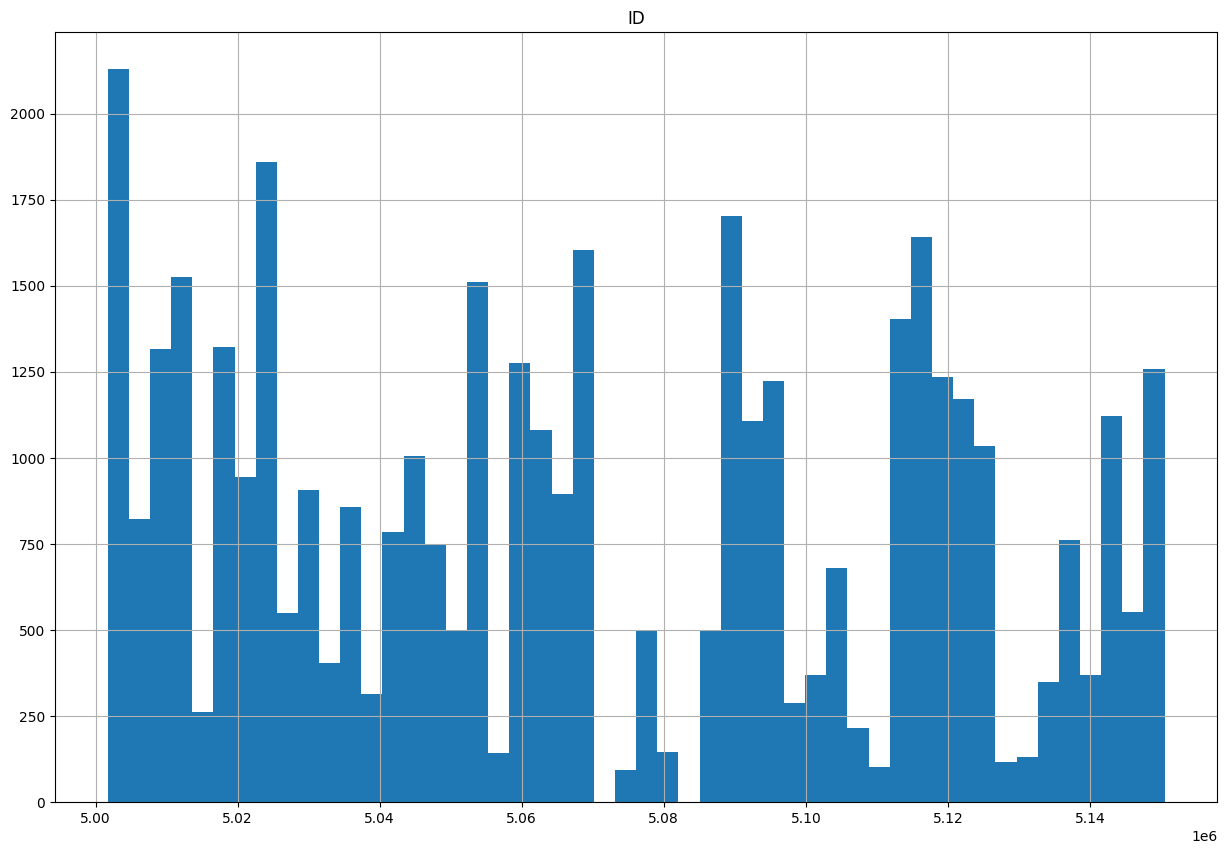

In [117]:
#Negative MONTHS_BALANCE values indicate how many months ago an event occurred.

credit_record.hist(bins=50, figsize=(15, 10))
plt.show()

In [118]:
status_check = credit_record.groupby('ID')['STATUS'].nunique().reset_index()
status_check.rename(columns={'STATUS': 'unique_status_count'}, inplace=True)

print(status_check)


            ID  unique_status_count
0      5001711                    1
1      5001712                    1
2      5001713                    1
3      5001714                    1
4      5001715                    1
...        ...                  ...
40819  5150481                    1
40820  5150482                    1
40821  5150483                    1
40822  5150484                    1
40823  5150487                    1

[40824 rows x 2 columns]


In [119]:
print(credit_record.info())
print(credit_record.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40824 entries, 0 to 40823
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      40824 non-null  int64 
 1   STATUS  40824 non-null  object
dtypes: int64(1), object(1)
memory usage: 638.0+ KB
None
                 ID
count  4.082400e+04
mean   5.069850e+06
std    4.547569e+04
min    5.001711e+06
25%    5.025759e+06
50%    5.065554e+06
75%    5.113966e+06
max    5.150487e+06


In [120]:
# Check for duplicates in the dataset
num_duplicates = credit_record.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [121]:
credit_record.to_csv('/content/drive/MyDrive/Ai project/credit_record_cleaned.csv', index=False)


## Mapping and merging two csv file

In [148]:
application_record_cleaned = pd.read_csv('/content/drive/MyDrive/Ai project/application_record_cleaned.csv')
credit_record_cleaned= pd.read_csv('/content/drive/MyDrive/Ai project/credit_record_cleaned.csv')
status_mapping = {
    'C': 1,  # Approved
    'X': 1,  # Approved
    '0': 0,  # Not Approved
    '1': 0,  # Not Approved
    '2': 0,  # Not Approved
    '3': 0,  # Not Approved
    '4': 0,  # Not Approved
    '5': 0   # Not Approved
}

# Apply the mapping to create a new 'status_mapped' column in credit_record
credit_record['status_mapped'] = credit_record['STATUS'].map(status_mapping)

# Merge application_record with credit_record based on a common column (e.g., 'id')
merged_csv = pd.merge(application_record_cleaned, credit_record_cleaned, on='ID', how='inner')  # Adjust the merge type as needed

# Save the merged data to a new CSV file
merged_csv.to_csv('/content/drive/MyDrive/Ai project/merged_application_credit_record.csv', index=False)

print("CSV files merged successfully into 'merged_application_credit_record.csv'")


CSV files merged successfully into 'merged_application_credit_record.csv'


In [149]:
common_ids = set(application_record_cleaned['ID']).intersection(set(credit_record_cleaned['ID']))
print(f"Number of overlapping IDs: {len(common_ids)}")
print(f"Unique IDs in application_record_cleaned: {application_record_cleaned['ID'].nunique()}")
print(f"Unique IDs in credit_record_cleaned: {credit_record_cleaned['ID'].nunique()}")


Number of overlapping IDs: 32175
Unique IDs in application_record_cleaned: 438510
Unique IDs in credit_record_cleaned: 40824


In [154]:
merged_csv = pd.read_csv('/content/drive/MyDrive/Ai project/merged_application_credit_record.csv')
print('Record Count')
print(merged_csv.count())
print('\nNull count')
print(merged_csv.isnull().sum())



Record Count
ID                     32175
CODE_GENDER            32175
FLAG_OWN_CAR           32175
FLAG_OWN_REALTY        32175
CNT_CHILDREN           32175
AMT_INCOME_TOTAL       32175
NAME_INCOME_TYPE       32175
NAME_EDUCATION_TYPE    32175
NAME_FAMILY_STATUS     32175
NAME_HOUSING_TYPE      32175
DAYS_BIRTH             32175
DAYS_EMPLOYED          32175
FLAG_MOBIL             32175
FLAG_WORK_PHONE        32175
FLAG_PHONE             32175
FLAG_EMAIL             32175
OCCUPATION_TYPE        32175
CNT_FAM_MEMBERS        32175
STATUS                 32175
dtype: int64

Null count
ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_